# Importing Libraries

In [1]:
import pandas as pd #for dataframe
import os #To Interact with local system directories
import numpy as np # linear algebra
import matplotlib.pyplot as plt # for visualizations
import seaborn as sns # for visualizations
from scipy import stats #import chi2_contigency #  for Chi square Test
from scipy.stats import chi2_contingency
from fancyimpute import KNN #for missing value analysis
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor # for decission tree
from sklearn.ensemble import RandomForestRegressor # for random forest
import sklearn.feature_selection as fs # feature selection library in scikit-learn
import statsmodels.api as sm # for linear regression
%matplotlib inline

# Setting working Directory

In [2]:
os.getcwd()
os.chdir("C:\Python")
os.getcwd()

'C:\\Python'

# Loading the dataset

In [3]:
df_day = pd.read_csv('day.csv')

# Explortory Data Analysis

In [4]:
df_day.shape

(731, 16)

In [5]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [6]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [8]:
# Dropping the 1st 2 columns i.e. 'instant' & 'dteday' because these are statisticaly insignificant
df_day=df_day.drop(['instant','dteday'],axis=1)

In [9]:
df_day.shape

(731, 14)

In [10]:
df_day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Assigning appropriate types to variables

In [11]:
cat_var=['season','yr','mnth','holiday','weekday','workingday','weathersit']
df_day[cat_var]=df_day[cat_var].apply(lambda x: x.astype('category') )

In [12]:
df_day.describe()

,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [13]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
season        731 non-null category
yr            731 non-null category
mnth          731 non-null category
holiday       731 non-null category
weekday       731 non-null category
workingday    731 non-null category
weathersit    731 non-null category
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: category(7), float64(4), int64(3)
memory usage: 46.4 KB


## Univariate Analysis

#### 1. Target Variable Analysis

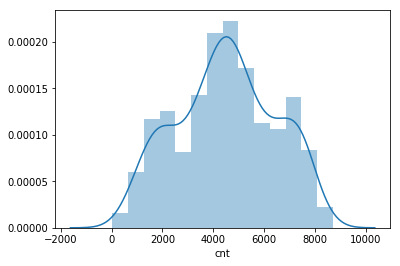

In [14]:
#plotting target variable
sns.distplot(df_day['cnt']);

In [15]:
print("Skewness: %f" % df_day['cnt'].skew())
print("Kurtosis: %f" % df_day['cnt'].kurt())

Skewness: -0.047353
Kurtosis: -0.811922


#### 2. Independent Variables Analysis

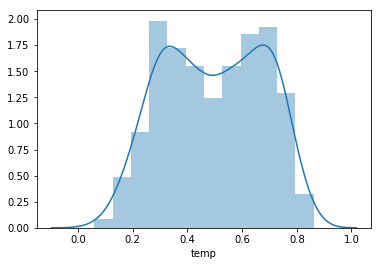

In [16]:
sns.distplot(df_day['temp']);

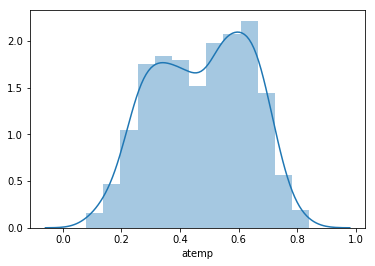

In [17]:
sns.distplot(df_day['atemp']);

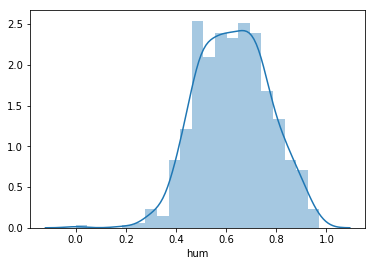

In [18]:
sns.distplot(df_day['hum']);

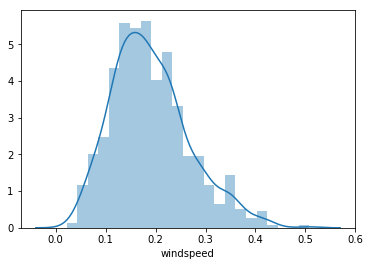

In [19]:
sns.distplot(df_day['windspeed']);

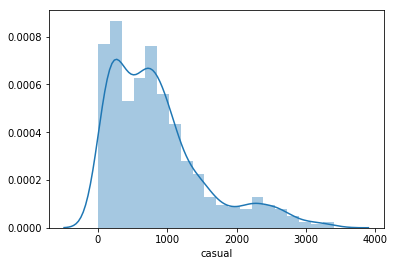

In [20]:
sns.distplot(df_day['casual']);

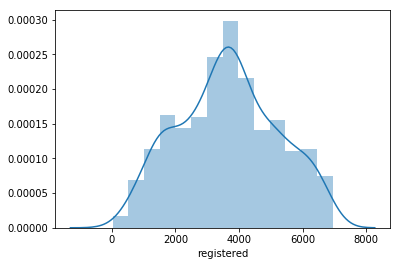

In [21]:
sns.distplot(df_day['registered']);

## Bivariate Analysis

#### Relation between Numerical Variable 'temp' and target variable 'cnt'

In [22]:
df_day['temp'].value_counts()

0.265833    5
0.635000    5
0.437500    4
0.564167    4
0.649167    4
0.484167    4
0.680000    4
0.696667    4
0.710833    4
0.514167    3
0.282500    3
0.667500    3
0.459167    3
0.554167    3
0.733333    3
0.636667    3
0.606667    3
0.342500    3
0.731667    3
0.653333    3
0.393333    3
0.530000    3
0.343333    3
0.414167    3
0.353333    3
0.577500    3
0.775000    3
0.715833    3
0.274167    3
0.550000    3
           ..
0.834167    1
0.381667    1
0.346667    1
0.765833    1
0.640833    1
0.415833    1
0.545000    1
0.359167    1
0.365833    1
0.623333    1
0.160870    1
0.365217    1
0.712500    1
0.348696    1
0.096522    1
0.538333    1
0.361667    1
0.715000    1
0.711667    1
0.343478    1
0.335833    1
0.570000    1
0.282609    1
0.396667    1
0.404167    1
0.226957    1
0.354167    1
0.580833    1
0.231667    1
0.337500    1
Name: temp, Length: 499, dtype: int64

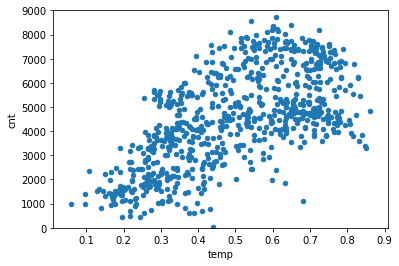

In [23]:
#Now drawing scatter plot between 'temp' and 'cnt' variables

var = 'temp'
data = pd.concat([df_day['cnt'], df_day[var]], axis=1)
data.plot.scatter(x=var, y='cnt', ylim=(0,9000));

It is showing  there is good positive relation between 'temp' and 'cnt'

#### Relation between Numerical Variable 'atemp' and target variable 'cnt'

In [24]:
df_day['atemp'].value_counts()

0.654688    4
0.637008    3
0.375621    3
0.542929    2
0.603554    2
0.537896    2
0.243058    2
0.351629    2
0.594704    2
0.450121    2
0.387608    2
0.242400    2
0.298422    2
0.724121    2
0.611121    2
0.595346    2
0.378779    2
0.594083    2
0.398350    2
0.425492    2
0.574500    2
0.607962    2
0.522721    2
0.318812    2
0.654042    2
0.466525    2
0.325750    2
0.703292    2
0.607975    2
0.654054    2
           ..
0.326379    1
0.565217    1
0.228587    1
0.497463    1
0.338383    1
0.255679    1
0.542925    1
0.513242    1
0.533450    1
0.565067    1
0.445062    1
0.647100    1
0.513848    1
0.355425    1
0.645846    1
0.412237    1
0.116175    1
0.274621    1
0.707071    1
0.188413    1
0.323867    1
0.456429    1
0.150888    1
0.761367    1
0.461483    1
0.612379    1
0.464021    1
0.624371    1
0.512621    1
0.538521    1
Name: atemp, Length: 690, dtype: int64

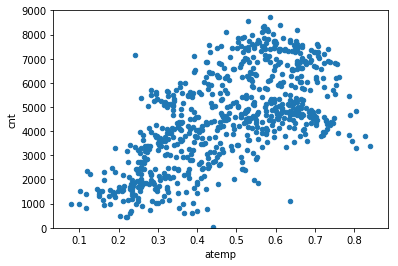

In [25]:
#Now drawinging scatter plot between 'atemp' and 'cnt' variables

var = 'atemp'
data = pd.concat([df_day['cnt'], df_day[var]], axis=1)
data.plot.scatter(x=var, y='cnt', ylim=(0,9000));

It is showing  there is good positive relation between 'atemp' and 'cnt'

#### Relation between Numerical Variable 'hum' and target variable 'cnt'

In [26]:
df_day['hum'].value_counts()

0.613333    4
0.568333    3
0.542500    3
0.752917    3
0.697083    3
0.630833    3
0.605000    3
0.590000    3
0.690000    3
0.729583    3
0.741250    3
0.552083    3
0.590417    3
0.483333    3
0.722917    3
0.538333    3
0.570000    3
0.862500    2
0.757500    2
0.434167    2
0.441250    2
0.672917    2
0.537917    2
0.410000    2
0.677500    2
0.805833    2
0.734583    2
0.668750    2
0.540833    2
0.694167    2
           ..
0.642500    1
0.422500    1
0.494167    1
0.616957    1
0.700833    1
0.640417    1
0.187917    1
0.414583    1
0.559167    1
0.691250    1
0.581667    1
0.561667    1
0.720417    1
0.896667    1
0.838750    1
0.797083    1
0.426250    1
0.457500    1
0.618333    1
0.609167    1
0.812917    1
0.810833    1
0.537500    1
0.712500    1
0.704167    1
0.615000    1
0.686667    1
0.480833    1
0.649565    1
0.741739    1
Name: hum, Length: 595, dtype: int64

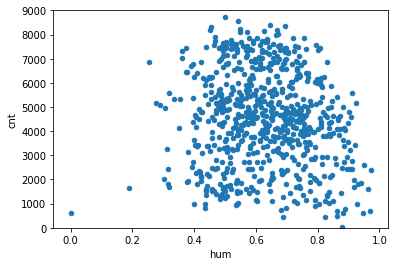

In [27]:
#Now drawinging scatter plot between 'hum' and 'cnt' variables

var = 'hum'
data = pd.concat([df_day['cnt'], df_day[var]], axis=1)
data.plot.scatter(x=var, y='cnt', ylim=(0,9000));

It is showing  there is poor relation between 'hum' and 'cnt'

#### Relation between Numerical Variable 'windspeed' and target variable 'cnt'

In [28]:
df_day['windspeed'].value_counts()

0.228858    3
0.118792    3
0.134954    3
0.149883    3
0.166667    3
0.110700    3
0.136817    3
0.167912    3
0.106350    3
0.116908    2
0.342667    2
0.157350    2
0.144904    2
0.121896    2
0.146775    2
0.102000    2
0.130600    2
0.296037    2
0.215792    2
0.361950    2
0.131221    2
0.122512    2
0.266175    2
0.140550    2
0.118167    2
0.063450    2
0.133721    2
0.168726    2
0.230725    2
0.236937    2
           ..
0.293961    1
0.117562    1
0.139308    1
0.077125    1
0.064071    1
0.147392    1
0.132467    1
0.162938    1
0.207721    1
0.271158    1
0.115522    1
0.225754    1
0.200875    1
0.237567    1
0.197763    1
0.213009    1
0.169779    1
0.136926    1
0.215804    1
0.103863    1
0.284829    1
0.193417    1
0.292287    1
0.093921    1
0.125621    1
0.388067    1
0.185333    1
0.189667    1
0.290421    1
0.415429    1
Name: windspeed, Length: 650, dtype: int64

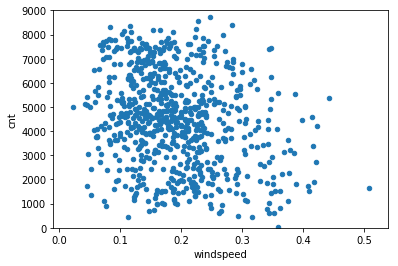

In [29]:
#Now drawing scatter plot between 'windspeed' and 'cnt' variables

var = 'windspeed'
data = pd.concat([df_day['cnt'], df_day[var]], axis=1)
data.plot.scatter(x=var, y='cnt', ylim=(0,9000));

It is showing  there is negative relation between 'windspeed' and 'cnt'

#### Relation between Numerical Variable 'casual' and target variable 'cnt'

In [30]:
df_day['casual'].value_counts()

968     4
120     4
244     3
653     3
639     3
123     3
140     3
163     3
775     3
692     2
174     2
178     2
699     2
695     2
694     2
1026    2
190     2
1077    2
678     2
676     2
195     2
673     2
667     2
665     2
729     2
745     2
155     2
2795    2
349     2
819     2
       ..
559     1
560     1
562     1
563     1
2613    1
568     1
569     1
571     1
2622    1
579     1
2634    1
1612    1
845     1
1619    1
1278    1
1557    1
599     1
601     1
603     1
606     1
2708    1
1633    1
611     1
1088    1
613     1
614     1
1639    1
616     1
620     1
1118    1
Name: casual, Length: 606, dtype: int64

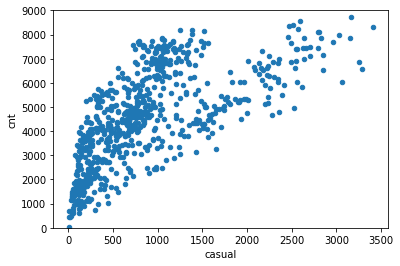

In [31]:
#Now drawing scatter plot between 'casual' and 'cnt' variables

var = 'casual'
data = pd.concat([df_day['cnt'], df_day[var]], axis=1)
data.plot.scatter(x=var, y='cnt', ylim=(0,9000));

It is showing  there is somewhat good positive relation between 'casual' and 'cnt'

#### Relation between Numerical Variable 'registered' and target variable 'cnt'

In [32]:
df_day['registered'].value_counts()

4841    3
1707    3
6248    3
3578    2
4429    2
1730    2
3848    2
2115    2
3840    2
674     2
1368    2
1454    2
3854    2
2713    2
4446    2
5711    2
3425    2
3614    2
4934    2
3594    2
3896    2
1628    2
4224    2
3248    2
4232    2
3946    2
2419    2
5219    2
4240    2
5265    2
       ..
2697    1
1672    1
6790    1
3717    1
4739    1
3714    1
2688    1
3185    1
1432    1
6803    1
5780    1
1687    1
6911    1
4790    1
1714    1
4750    1
2733    1
1708    1
1705    1
6433    1
5124    1
1689    1
1700    1
1699    1
1697    1
2720    1
670     1
1693    1
4763    1
4097    1
Name: registered, Length: 679, dtype: int64

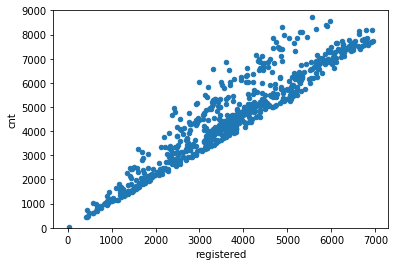

In [33]:
#Now drawing scatter plot between 'registered' and 'cnt' variables

var = 'registered'
data = pd.concat([df_day['cnt'], df_day[var]], axis=1)
data.plot.scatter(x=var, y='cnt', ylim=(0,9000));

It is showing there is good relation between 'registered' and 'cnt'

#### Relation between Categorical Variable 'weekdays' and target variable 'cnt'

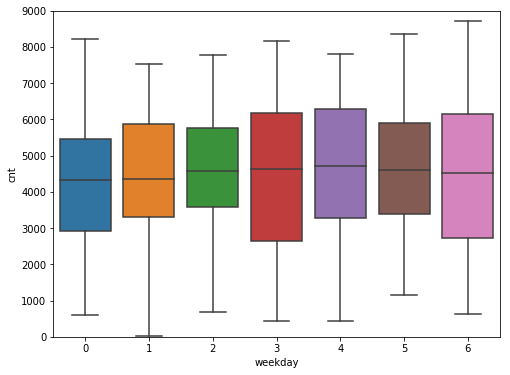

In [34]:
#box plot 'Weekdays' with 'CNT'
var_weekdays = 'weekday'
data = pd.concat([df_day['cnt'], df_day[var_weekdays]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var_weekdays, y="cnt", data=data)
fig.axis(ymin=0, ymax=9000);

It is showing that for all the weekdays median in between 4000- 5000  

#### Relation between Categorical Variable 'holiday' and target variable 'cnt'

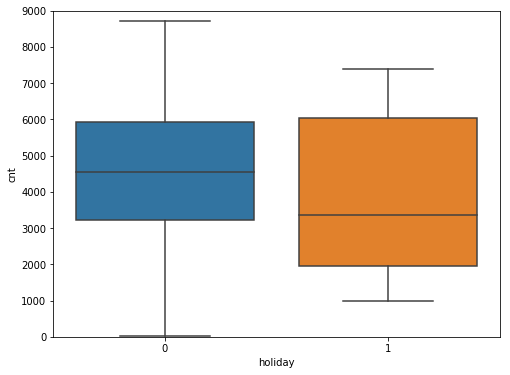

In [35]:
#box plot 'holiday' with 'CNT'
var_holiday = 'holiday'
data = pd.concat([df_day['cnt'], df_day[var_holiday]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var_holiday, y="cnt", data=data)
fig.axis(ymin=0, ymax=9000);

It is showing that median  high on  0 compared to 1

#### Relation between Categorical Variable 'yr' and target variable 'cnt'

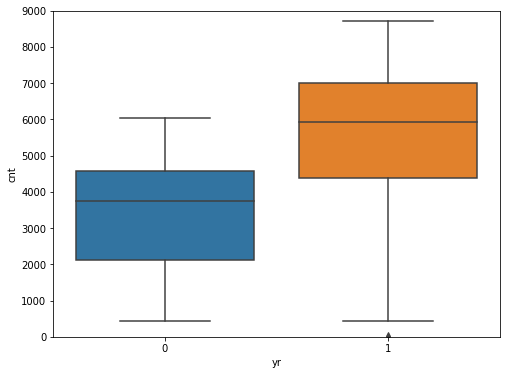

In [36]:
#box plot 'holiday' with 'CNT'
var_yr = 'yr'
data = pd.concat([df_day['cnt'], df_day[var_yr]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var_yr, y="cnt", data=data)
fig.axis(ymin=0, ymax=9000);

It's showing that median is higher on 2012 than 2011

#### Relation between Categorical Variable 'mnth' and target variable 'cnt'

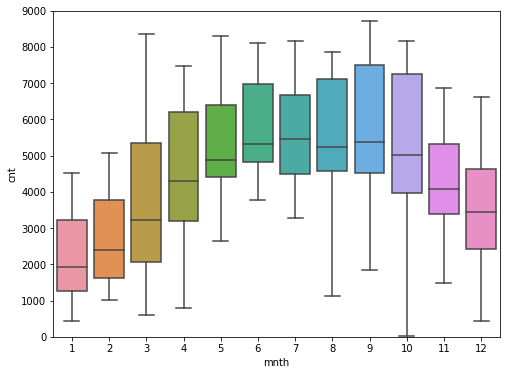

In [37]:
#box plot 'mnth' with 'CNT'
var_mnth = 'mnth'
data = pd.concat([df_day['cnt'], df_day[var_mnth]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var_mnth, y="cnt", data=data)
fig.axis(ymin=0, ymax=9000);

It's showing there's high variability in medians from different months, with July & september having highest median

#### Relation between Categorical Variable 'season' and target variable 'cnt'

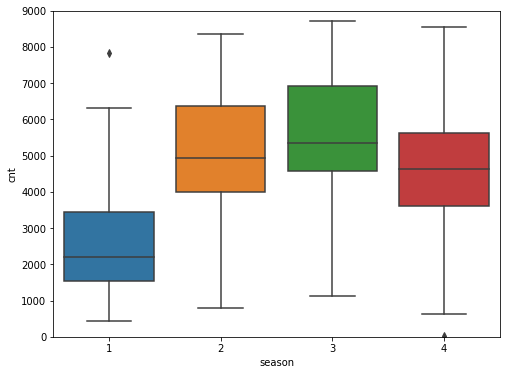

In [38]:
#box plot 'season' with 'CNT'
var_season = 'season'
data = pd.concat([df_day['cnt'], df_day[var_season]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var_season, y="cnt", data=data)
fig.axis(ymin=0, ymax=9000);

It's showing that median is higher for season 2 & season 3 compared to other seasons

#### Relation between Categorical Variable 'workingday' and target variable 'cnt'

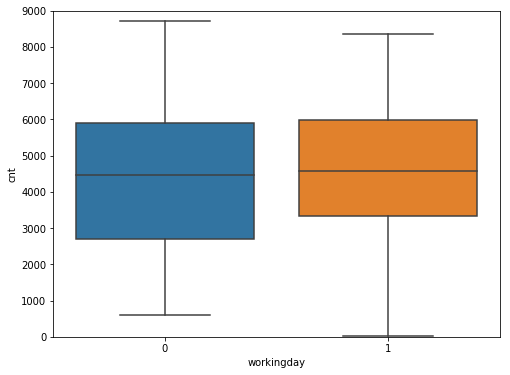

In [39]:
#box plot 'workingday' with 'CNT'
var_wd = 'workingday'
data = pd.concat([df_day['cnt'], df_day[var_wd]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var_wd, y="cnt", data=data)
fig.axis(ymin=0, ymax=9000);

It's showing the median is approximately same whether the day is working day or not

#### Relation between Categorical Variable 'weathersit' and target variable 'cnt'

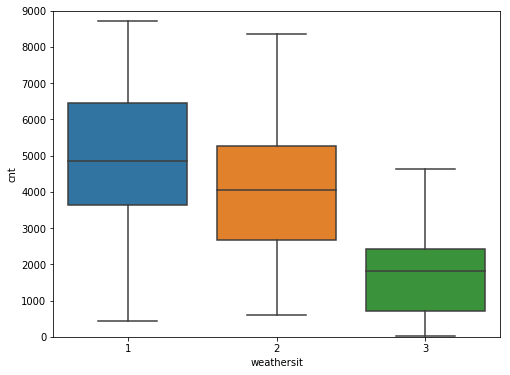

In [40]:
#box plot 'weathersit' with 'CNT'
var_ws = 'weathersit'
data = pd.concat([df_day['cnt'], df_day[var_ws]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var_ws, y="cnt", data=data)
fig.axis(ymin=0, ymax=9000);

It's showing that the median follows this pattern in the weathersit variable : 1>2>3

# Missing Value Analysis

In [41]:
#Calculating missing value
missing_val = pd.DataFrame(df_day.isnull().sum())

In [42]:
missing_val

,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0
atemp,0
hum,0


So, I can see there are no missing values

# Outlier Analysis

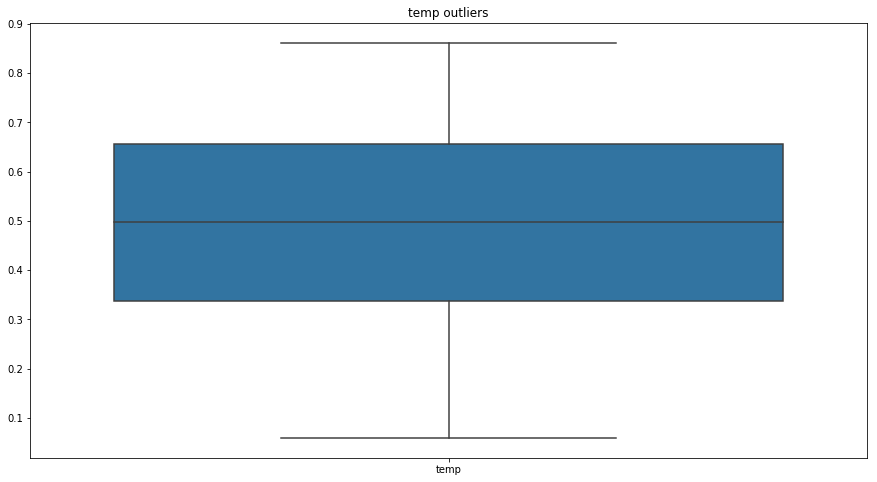

In [43]:
fig,ax=plt.subplots(figsize=(15,8))
#Boxplot for temp outliers
sns.boxplot(data=df_day[['temp']])
ax.set_title('temp outliers')
plt.show()

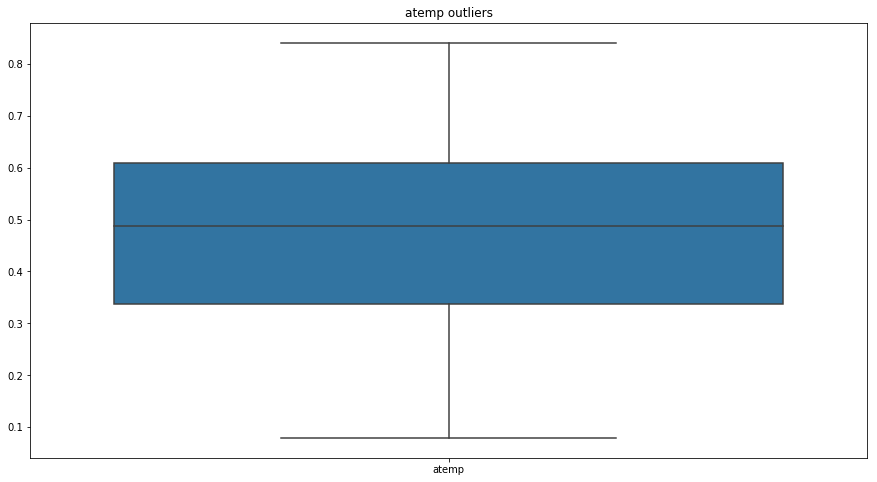

In [44]:
fig,ax=plt.subplots(figsize=(15,8))
#Boxplot for atemp outliers
sns.boxplot(data=df_day[['atemp']])
ax.set_title('atemp outliers')
plt.show()

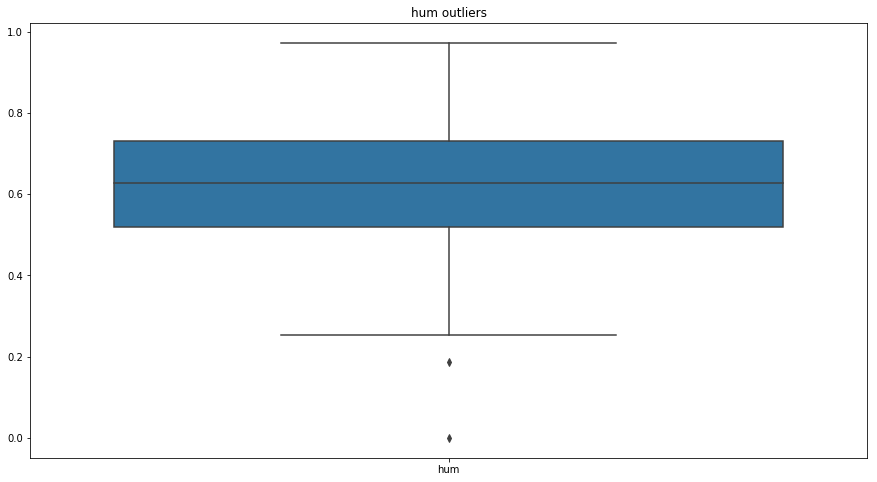

In [45]:
fig,ax=plt.subplots(figsize=(15,8))
#Boxplot for hum outliers
sns.boxplot(data=df_day[['hum']])
ax.set_title('hum outliers')
plt.show()

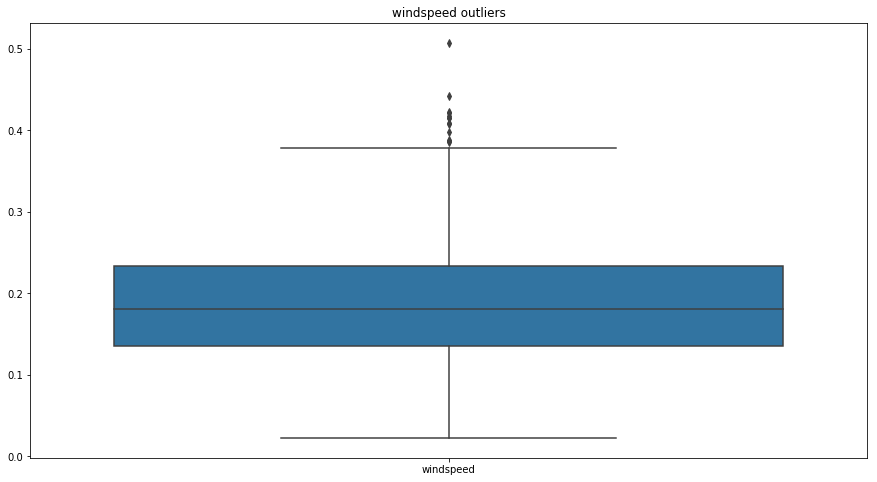

In [46]:
fig,ax=plt.subplots(figsize=(15,8))
#Boxplot for windspeed outliers
sns.boxplot(data=df_day[['windspeed']])
ax.set_title('windspeed outliers')
plt.show()

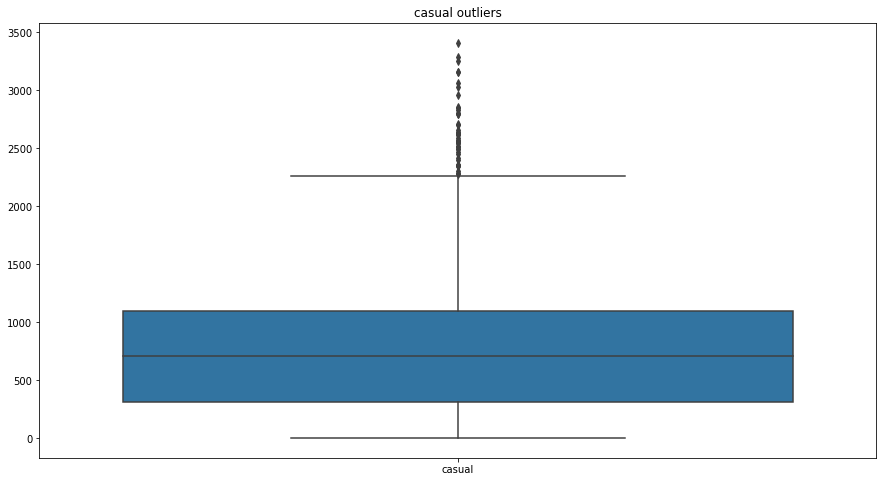

In [47]:
fig,ax=plt.subplots(figsize=(15,8))
#Boxplot for casual outliers
sns.boxplot(data=df_day[['casual']])
ax.set_title('casual outliers')
plt.show()

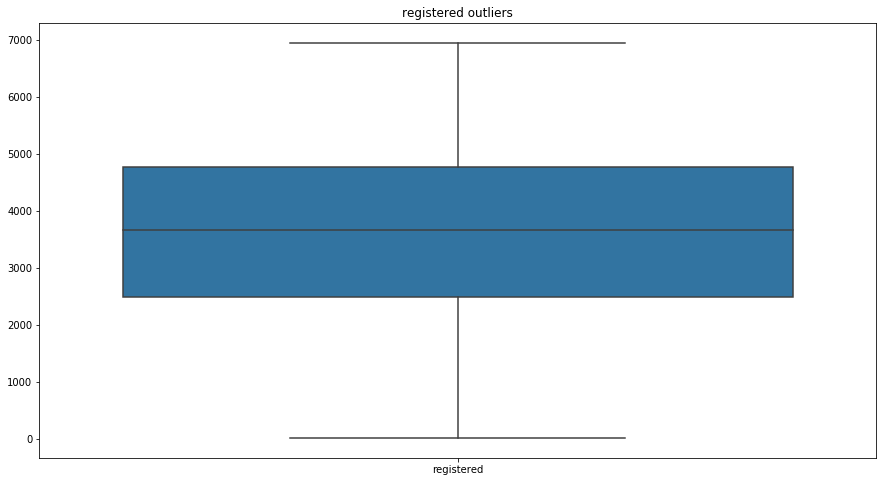

In [48]:
fig,ax=plt.subplots(figsize=(15,8))
#Boxplot for registered outliers
sns.boxplot(data=df_day[['registered']])
ax.set_title('registered outliers')
plt.show()

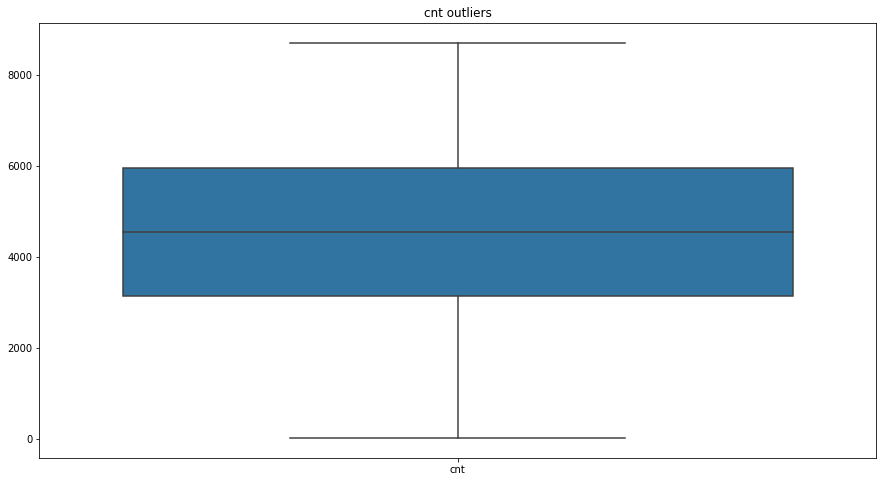

In [49]:
fig,ax=plt.subplots(figsize=(15,8))
#Boxplot for cnt outliers
sns.boxplot(data=df_day[['cnt']])
ax.set_title('cnt outliers')
plt.show()

#### I Can see 'hum', 'windspeed', 'casual' variables contain outliers

In [50]:
#creating dataframe for hum
df_1=pd.DataFrame(df_day,columns=['hum'])
c1 = ['hum']

In [51]:
for i in c1:
    print(i)
    q75,q25=np.percentile(df_1.loc[:,i],[75,25]) # Divide data into 75%quantile and 25%quantile.
    iqr=q75-q25 #Inter quantile range
    LL1=q25-(iqr*1.5) #inner fence
    UL1=q75+(iqr*1.5) #outer fence
    
    print(LL1)
    print(UL1)

hum
0.20468725
1.0455212500000002


In [52]:
df_1.loc[df_1['hum']<LL1,:i]=np.nan  #Replace with NA
df_1.loc[df_1['hum']>UL1,:i]=np.nan  #Replace with NA

In [53]:
#Calculating missing value
missing_val_1 = pd.DataFrame(df_1.isnull().sum())

In [54]:
missing_val_1

,0
hum,2


In [55]:
#creating dataframe for windspeed
df_2=pd.DataFrame(df_day,columns=['windspeed'])
c2 = ['windspeed']

In [56]:
for i in c2:
    print(i)
    q75,q25=np.percentile(df_2.loc[:,i],[75,25]) # Divide data into 75%quantile and 25%quantile.
    iqr=q75-q25 #Inter quantile range
    LL2=q25-(iqr*1.5) #inner fence
    UL2=q75+(iqr*1.5) #outer fence
    
    print(LL2)
    print(UL2)

windspeed
-0.012446750000000034
0.38061125


In [57]:
df_2.loc[df_2['windspeed']<LL2,:i]=np.nan  #Replace with NA
df_2.loc[df_2['windspeed']>UL2,:i]=np.nan  #Replace with NA

In [58]:
#Calculating missing value
missing_val_2 = pd.DataFrame(df_2.isnull().sum())

In [59]:
missing_val_2

,0
windspeed,13


In [60]:
#creating dataframe for casual
df_3 = pd.DataFrame(df_day,columns=['casual'])
c3 = ['casual']

In [61]:
for i in c3:
    print(i)
    q75,q25=np.percentile(df_3.loc[:,i],[75,25]) # Divide data into 75%quantile and 25%quantile.
    iqr=q75-q25 #Inter quantile range
    LL3=q25-(iqr*1.5) #inner fence
    UL3=q75+(iqr*1.5) #outer fence
    
    print(LL3)
    print(UL3)

casual
-855.25
2266.75


In [62]:
df_3.loc[df_3['casual']<LL3,:i]=np.nan  #Replace with NA
df_3.loc[df_3['casual']>UL3,:i]=np.nan  #Replace with NA

In [63]:
#Calculating missing value
missing_val_3 = pd.DataFrame(df_3.isnull().sum())

In [64]:
missing_val_3

,0
casual,44


In [65]:
#merging the missing values together
missing_val_ol = missing_val_1.append(missing_val_2).append(missing_val_3)

In [66]:
missing_val_ol

,0
hum,2
windspeed,13
casual,44


In [67]:
#df_1['hum'].loc[4]

In [70]:
#create missing value
#df_1['hum'].loc[4] = np.nan

#### actual value = 0.436957
#### mean = 0.6291968177842561
#### median = 0.6270834999999999
#### knn = 0.7075414618709852
#### So, median is giving the best result here

In [681]:
#mean method
#df_1['hum'] = df_1['hum'].fillna(df_1['hum'].mean())
#After this line, again load df_1 dataset & assign 'na' to outliers & create missing value

In [741]:
#median method
#df_1['hum'] = df_1['hum'].fillna(df_1['hum'].median())
#After this line, again load df_1 dataset & assign 'na' to outliers & create missing value

In [800]:
#KNN imputation
#Assigning levels to the categories
#lis = []
#for i in range(0, df_1.shape[1]):
 #   print(i)
  #  if(df_1.iloc[:,i].dtypes == 'object'):
   #     df_1.iloc[:,i] = pd.Categorical(df_1.iloc[:,i])
    #    print(df_1[[i]])
     #   df_1.iloc[:,i] = df_1.iloc[:,i].cat.codes 
      #  df_1.iloc[:,i] = df_1.iloc[:,i].astype('object')
        
       # lis.append(df_1.columns[i])

0
1
2


In [801]:
#Apply KNN imputation algorithm
#df_1 = pd.DataFrame(KNN(k = 3).fit_transform(df_1), columns = df_1.columns)
#After this line, again load df_1 dataset & assign 'na' to outliers

Imputing row 1/731 with 0 missing, elapsed time: 0.095
Imputing row 101/731 with 0 missing, elapsed time: 0.095
Imputing row 201/731 with 0 missing, elapsed time: 0.096
Imputing row 301/731 with 0 missing, elapsed time: 0.096
Imputing row 401/731 with 0 missing, elapsed time: 0.096
Imputing row 501/731 with 0 missing, elapsed time: 0.097
Imputing row 601/731 with 0 missing, elapsed time: 0.098
Imputing row 701/731 with 0 missing, elapsed time: 0.098
[KNN] Warning: 132/2193 still missing after imputation, replacing with 0


In [67]:
#Imputing the outliers by median Imputation
df_1['hum']=df_1['hum'].fillna(df_1['hum'].median())
df_2['windspeed']=df_2['windspeed'].fillna(df_2['windspeed'].median())
df_3['casual']=df_3['casual'].fillna(df_3['casual'].median())

Now again checking for nan

In [68]:
df_1.isnull().sum()

hum    0
dtype: int64

In [69]:
df_2.isnull().sum()

windspeed    0
dtype: int64

In [70]:
df_3.isnull().sum()

casual    0
dtype: int64

In [71]:
#Replacing with the imputated hum
df_day['hum']=df_day['hum'].replace(df_1['hum'])
#Replacing with the imputated windspeed
df_day['windspeed']=df_day['windspeed'].replace(df_2['windspeed'])
#Replacing with the imputated casual
df_day['casual']=df_day['casual'].replace(df_3['casual'])

# Feature Selection

In [72]:
df_day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,253.0,654,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,695.0,670,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1138.0,1229,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,409.0,1454,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,166.0,1518,1600


In [73]:
df_day.describe()

,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.628996,0.190486,1042.699042,3656.172367,4504.348837
std,0.183051,0.162961,0.140670,0.077498,639.699394,1560.256377,1937.211452
min,0.059130,0.079070,0.187917,0.022392,2.000000,20.000000,22.000000
25%,0.337083,0.337842,0.521041,0.134950,674.000000,2497.000000,3152.000000
50%,0.498333,0.486733,0.627500,0.180975,907.000000,3662.000000,4548.000000
75%,0.655417,0.608602,0.730833,0.233214,1325.000000,4776.500000,5956.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [74]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
season        731 non-null category
yr            731 non-null category
mnth          731 non-null category
holiday       731 non-null category
weekday       731 non-null category
workingday    731 non-null category
weathersit    731 non-null category
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null float64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: category(7), float64(5), int64(2)
memory usage: 46.4 KB


## Correlation Analysis 

In [75]:
#selecting numeric variables only
day_numeric = df_day.loc[:,['temp','atemp','hum','windspeed','casual','registered','cnt']]

In [76]:
day_numeric.shape

(731, 7)

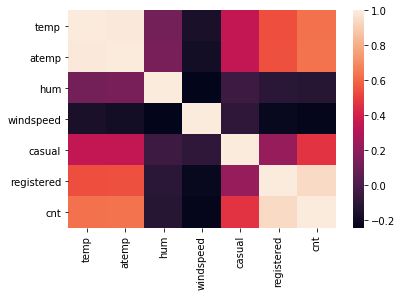

In [77]:
#heatmap
sns.heatmap(day_numeric.corr())

In [78]:
#Selection of numerical feature  based  on pearson correlation 

day_numeric.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.0,0.99,0.12,-0.16,0.35,0.54,0.63
atemp,0.99,1.0,0.14,-0.18,0.35,0.54,0.63
hum,0.12,0.14,1.0,-0.24,-0.05,-0.11,-0.12
windspeed,-0.16,-0.18,-0.24,1.0,-0.093,-0.22,-0.23
casual,0.35,0.35,-0.05,-0.093,1.0,0.22,0.47
registered,0.54,0.54,-0.11,-0.22,0.22,1.0,0.95
cnt,0.63,0.63,-0.12,-0.23,0.47,0.95,1.0


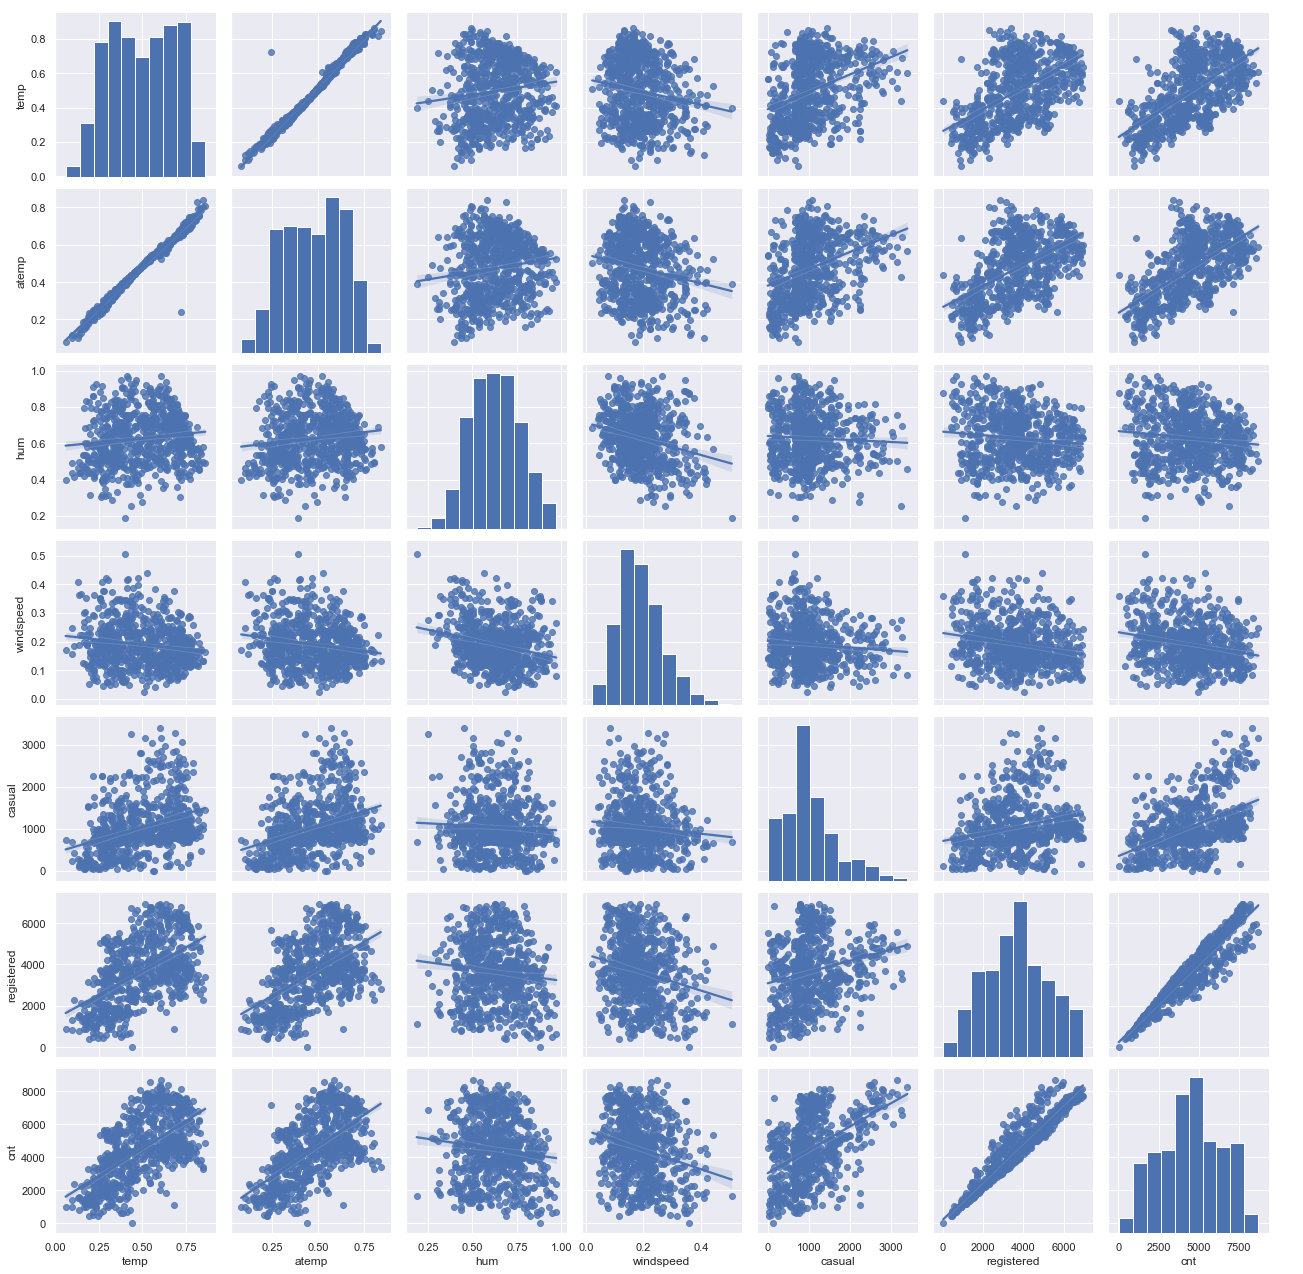

In [79]:
# checking relationship with scatter plots

sns.set()
cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual','registered','cnt']
sns.pairplot(day_numeric[cols], height = 2.5,kind="reg")
plt.show();

I can see high positive correlation between Independent variable 'temp' and 'atemp' so, I'll drop atemp

## Analysis of Variance (ANOVA) Test

-  It is carried out to compare between each groups in a categorical variable.
-  ANOVA only lets us know the means for different groups are same or not. It doesn’t help us identify which mean is different.
-  Hypothesis testing :
    -  Null Hypothesis: mean of all categories in a variable are same.
    -  Alternate Hypothesis: mean of at least one category in a variable is different.
-  If p-value is less than 0.05 then we reject the null hypothesis.
-  And if p-value is greater than 0.05 then we accept the null hypothesis.

In [80]:
cat_var

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

In [81]:
def anova_test(df_day,target):
    for i in cat_var:
        formula=('{} ~ {}').format(target, i)
        df_day.lm = ols(formula,data=df_day).fit()
        table = sm.stats.anova_lm(df_day.lm, typ=1)
        print('Anova table between',target,'and',i,'is\n',table)

In [82]:
from statsmodels.formula.api import ols

In [83]:
print('\n For target var = cnt--')
anova_test(df_day,'cnt')


 For target var = cnt--
Anova table between cnt and season is
              df        sum_sq       mean_sq           F        PR(>F)
season      3.0  9.505959e+08  3.168653e+08  128.769622  6.720391e-67
Residual  727.0  1.788940e+09  2.460715e+06         NaN           NaN
Anova table between cnt and yr is
              df        sum_sq       mean_sq           F        PR(>F)
yr          1.0  8.798289e+08  8.798289e+08  344.890586  2.483540e-63
Residual  729.0  1.859706e+09  2.551038e+06         NaN           NaN
Anova table between cnt and mnth is
              df        sum_sq       mean_sq          F        PR(>F)
mnth       11.0  1.070192e+09  9.729021e+07  41.903703  4.251077e-70
Residual  719.0  1.669343e+09  2.321757e+06        NaN           NaN
Anova table between cnt and holiday is
              df        sum_sq       mean_sq         F    PR(>F)
holiday     1.0  1.279749e+07  1.279749e+07  3.421441  0.064759
Residual  729.0  2.726738e+09  3.740381e+06       NaN       NaN
Anova

After looking at above table we see that p-value is 
-  less than 0.05 for season
-  less than 0.05 for weathersit
-  less than 0.05 for yr
-  less than 0.05 for mnth
-  greater than 0.05 for weekday 
-  greater than 0.05 for holiday
-  greater than 0.05 for workingday

so, I can accept the null hypothesis for weekday, holiday & workingday, saying that the means of all categories in these variables are same.
&, I can't accept the null hypothesis for season, weathersit, yr & mnth, saying that the means of all categories in these variables are not same.

However, as ANOVA doesn't specify which categories means are different, we can't conclude from the test results about which categorical variables I should remove.

## Chi squared Test of independence

In [84]:
for i in cat_var:
    for j in cat_var:
        if(i != j):
            chi2, p, dof, ex = chi2_contingency(pd.crosstab(df_day[i], df_day[j]))
            if(p < 0.05):
                print(i,"and",j,"are dependent on each other with",p,'----Remove')
            else:
                print(i,"and",j,"are independent on each other with",p,'----Keep')

season and yr are independent on each other with 0.9999288084245916 ----Keep
season and mnth are dependent on each other with 0.0 ----Remove
season and holiday are independent on each other with 0.6831687073042003 ----Keep
season and weekday are independent on each other with 0.9999999999988407 ----Keep
season and workingday are independent on each other with 0.8865568364019545 ----Keep
season and weathersit are dependent on each other with 0.021179301044733697 ----Remove
yr and season are independent on each other with 0.9999288084245916 ----Keep
yr and mnth are independent on each other with 0.9999999999999892 ----Keep
yr and holiday are independent on each other with 0.9949247279855291 ----Keep
yr and weekday are independent on each other with 0.9999995848511959 ----Keep
yr and workingday are independent on each other with 0.9799434134248637 ----Keep
yr and weathersit are independent on each other with 0.12737941480418666 ----Keep
mnth and season are dependent on each other with 0.0

variables which are highly dependent on each other based on p-values are:
    - season and month-0
    - season and weathersit-0.0211
    - mnth and weathersit-0.014
    - holiday and weekday-8.56e-11
    - hoilday and workingday-4.033e-11
    - weekday and workingday-6.77e-136
So I will remove season,holiday.

In [85]:
df_day = df_day.drop(['atemp','season','holiday'],axis = 1)

In [86]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 11 columns):
yr            731 non-null category
mnth          731 non-null category
weekday       731 non-null category
workingday    731 non-null category
weathersit    731 non-null category
temp          731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null float64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: category(5), float64(4), int64(2)
memory usage: 39.0 KB


In [87]:
df_day.shape

(731, 11)

I'll develop models based on decision tree, random forest & linear regression. As feature scaling does not have any impact on these algorithms, I'm choosing not to do feature scaling.

# Model Development

## Decision Tree Regressor

MAPE = 5.725581445090314%

In [88]:
#dividing  test and train data  using skilearn   train_test_split 
train, test = train_test_split(df_day, test_size=0.2)

In [89]:
train.shape

(584, 11)

In [90]:
train.head()

,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
415,1,2,1,0,1,0.280000,0.507826,0.229083,1242.0,2627,3129
219,0,8,1,1,1,0.765000,0.592083,0.192175,846.0,3480,4326
706,1,12,5,1,2,0.320833,0.764167,0.130600,178.0,4659,5008
459,1,4,3,1,1,0.541667,0.469583,0.180975,1058.0,5378,6436
47,0,2,4,1,1,0.435833,0.505000,0.230104,1434.0,2216,2475


In [91]:
test.shape

(147, 11)

In [92]:
test.head()

,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
726,1,12,4,1,2,0.254167,0.652917,0.350133,1236.0,1867,2114
675,1,11,2,1,1,0.280833,0.567083,0.173513,482.0,5220,5686
494,1,5,3,1,2,0.575000,0.744167,0.216412,1050.0,4097,4717
277,0,10,3,1,1,0.538333,0.647917,0.177250,1511.0,4267,4826
358,0,12,0,0,1,0.274783,0.681304,0.155091,362.0,451,754


In [93]:
train_features_one = train[['yr','mnth','weekday','workingday','weathersit','temp','hum','windspeed','casual','registered']].values
train_target_feature = train['cnt'].values
test_features_one = test[['yr','mnth','weekday','workingday','weathersit','temp','hum','windspeed','casual','registered']].values
test_target_feature= test['cnt'].values

In [94]:
train_features_one

array([[1, 2, 1, ..., 0.22908299999999998, 1242.0, 2627],
       [0, 8, 1, ..., 0.192175, 846.0, 3480],
       [1, 12, 5, ..., 0.1306, 178.0, 4659],
       ...,
       [1, 11, 3, ..., 0.103246, 1045.0, 4531],
       [0, 8, 5, ..., 0.125621, 1051.0, 3854],
       [0, 6, 3, ..., 0.16791199999999998, 769.0, 4411]], dtype=object)

In [95]:
# Implementing  decision tree algorithm
fit_dt = DecisionTreeRegressor(max_depth=2).fit(train_features_one, train_target_feature)
print(fit_dt)

DecisionTreeRegressor(max_depth=2)


In [96]:
#Applying model on test data
predictions_DT = fit_dt.predict(test_features_one)

print(predictions_DT)

[1795.29508197 5699.48529412 5699.48529412 5699.48529412 1795.29508197
 1795.29508197 4118.43668122 5699.48529412 7176.80412371 4118.43668122
 5699.48529412 4118.43668122 5699.48529412 4118.43668122 4118.43668122
 5699.48529412 1795.29508197 4118.43668122 5699.48529412 1795.29508197
 5699.48529412 4118.43668122 4118.43668122 4118.43668122 5699.48529412
 7176.80412371 1795.29508197 4118.43668122 1795.29508197 4118.43668122
 5699.48529412 4118.43668122 7176.80412371 1795.29508197 5699.48529412
 7176.80412371 4118.43668122 1795.29508197 1795.29508197 1795.29508197
 5699.48529412 5699.48529412 7176.80412371 5699.48529412 5699.48529412
 4118.43668122 4118.43668122 5699.48529412 7176.80412371 4118.43668122
 1795.29508197 4118.43668122 1795.29508197 7176.80412371 1795.29508197
 5699.48529412 4118.43668122 5699.48529412 5699.48529412 7176.80412371
 1795.29508197 4118.43668122 7176.80412371 5699.48529412 1795.29508197
 1795.29508197 4118.43668122 5699.48529412 4118.43668122 1795.29508197
 7176.

In [97]:
#Calculating MAE
def MAE(y_true, y_pred): 
    mae = np.mean(np.abs(y_true - y_pred))
    return mae

MAE(test_target_feature, predictions_DT)

613.7591259706512

In [98]:
#Calculating MAPE
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape

MAPE(test_target_feature, predictions_DT)

22.20070065513246

In [99]:
#Calculating RMSE
def RMSE(y_test,y_predict):
    mse = np.mean((y_test-y_predict)**2)
    rmse=np.sqrt(mse)
    return rmse
RMSE(test_target_feature, predictions_DT)

775.6071461807484

In [100]:
#Controlling the overfitting by setting "max_depth" to 14 and "min_samples_split" to 7
max_depth = 14
min_samples_split =7
fit_dt_2 = DecisionTreeRegressor(max_depth =max_depth , min_samples_split =min_samples_split, random_state = 1)
fit_dt_2 = fit_dt_2.fit(train_features_one, train_target_feature)
print(fit_dt_2)

predictions_DT_two = fit_dt_2.predict(test_features_one)

print(predictions_DT_two)

DecisionTreeRegressor(max_depth=14, min_samples_split=7, random_state=1)
[2405.33333333 5520.75       4828.4        4828.4         399.
 2428.5        2908.5        5147.         6810.         5674.
 4949.         4878.         7110.33333333 4395.5        4341.66666667
 6610.33333333 2721.33333333 3359.83333333 4783.6         908.2
 6288.2        4590.         3198.66666667 3198.66666667 5761.33333333
 7743.33333333 1927.         5674.         1532.4        3100.33333333
 7110.33333333 4341.66666667 7556.33333333 2504.6        4272.
 7415.8        3100.33333333 1394.75       2721.33333333 2145.5
 5147.         6170.75       7314.2        5147.         5147.
 4056.25       5094.5        5827.16666667 6693.66666667 4187.33333333
 1891.75       4590.          998.         6926.          399.
 4954.         5094.5        7697.         7697.         7421.25
 2405.33333333 5307.4        7102.5        7697.         2390.16666667
 3388.66666667 3172.         4828.4        3612.4        2589.
 

In [101]:
MAE(test_target_feature,predictions_DT_two)

185.63095238095238

In [102]:
MAPE(test_target_feature,predictions_DT_two)

6.2179493367984975

In [103]:
RMSE(test_target_feature,predictions_DT_two)

270.4866330528033

In [104]:
#setting "max_depth" to 16 and "min_samples_split" to 8 
max_depth = 16
min_samples_split =8
fit_dt_3 = DecisionTreeRegressor(max_depth =max_depth , min_samples_split =min_samples_split, random_state = 1)
fit_dt_3 = fit_dt_3.fit(train_features_one, train_target_feature)
print(fit_dt_3)

predictions_DT_three = fit_dt_3.predict(test_features_one)

print(predictions_DT_three)

DecisionTreeRegressor(max_depth=16, min_samples_split=8, random_state=1)
[2405.33333333 5520.75       4828.4        4828.4         399.
 2428.5        2691.75       5104.28571429 6810.         5674.
 4949.         4878.         7110.33333333 4395.5        4341.66666667
 6610.33333333 2721.33333333 3359.83333333 4783.6         908.2
 6170.75       4590.         3177.85714286 3177.85714286 5761.33333333
 7743.33333333 3068.         5674.         1552.42857143 3100.33333333
 7110.33333333 4341.66666667 7581.57142857 2504.6        4272.
 7415.8        3100.33333333 1394.75       2721.33333333 2173.
 5104.28571429 6288.2        7314.2        5104.28571429 5104.28571429
 4056.25       4834.         5827.16666667 6693.66666667 4187.33333333
 1891.75       4590.         1013.57142857 6997.          399.
 4954.         4834.         7782.28571429 7782.28571429 7421.25
 2405.33333333 5307.4        7102.5        7782.28571429 2390.16666667
 3388.66666667 3172.         4828.4        3612.4        

In [105]:
MAE(test_target_feature,predictions_DT_three)

185.5722870100421

In [106]:
MAPE(test_target_feature,predictions_DT_three)

6.329778962029882

In [107]:
RMSE(test_target_feature,predictions_DT_three)

267.5550028944091

As the error rate is increasing, I'll use max_depth = 14 & min_samples_split =7

## Random Forest

MAPE = 4.0145657045380245 %

In [108]:
RF_model_one = RandomForestRegressor(n_estimators= 500, random_state=100).fit(train_features_one,train_target_feature)

In [109]:
RF_predict_one= RF_model_one.predict(test_features_one)

In [110]:
#Evaluating Random forest using  MAE 

MAE(test_target_feature,RF_predict_one)

138.19681632653058

In [111]:
#Evaluating Random forest using  MAPE 

MAPE(test_target_feature,RF_predict_one)

4.79237620452193

In [112]:
#Evaluating Random forest using  RMSE 

RMSE(test_target_feature,RF_predict_one)

184.98101946684474

In [113]:
 # mutual information regression for feature ordering
mir_result = fs.mutual_info_regression(train_features_one, train_target_feature)
mir_result

array([0.28560397, 0.38429587, 0.03315468, 0.02725097, 0.06953089,
       0.38803143, 0.05768516, 0.09161388, 0.30742081, 1.60031571])

In [114]:
#tuning  Random FOrest Model

importances = list(RF_model_one.feature_importances_)

print(importances)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(train_features_one, importances)]
# Sorting the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

[0.0010671071827156812, 0.0021171776399210706, 0.0019780312044411744, 0.011618125589145503, 0.00047391657328191625, 0.012411650516414201, 0.0018664820633328139, 0.0017189761429500525, 0.0604239965424295, 0.9063245365453682]


In [115]:
train_variables_one_1= train[['yr','mnth','weekday','workingday','weathersit','temp','hum','windspeed','casual','registered']]
train_variables_one_1
for name, importance in zip(train_variables_one_1, mir_result):
    print(name, "=", importance)

yr = 0.2856039652900306
mnth = 0.3842958676901107
weekday = 0.03315467646648784
workingday = 0.027250972220784986
weathersit = 0.06953088986050848
temp = 0.38803143406440466
hum = 0.057685162102471654
windspeed = 0.09161388442061913
casual = 0.30742081175868563
registered = 1.600315708443934


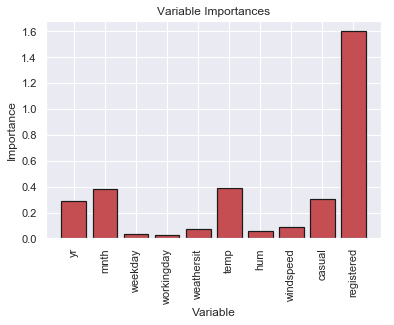

In [116]:
# list of x locations for plotting
x_values = list(range(len(mir_result)))

# Making a bar chart
plt.bar(x_values, mir_result, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)

# Tick labels for x axis
plt.xticks(x_values, train_variables_one_1, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [117]:
#the  above graph is stating  that  not all features are important to decide the  accuracy of the model
# Now I shall check model accuracy  by removing the least important feature, workingday
train_feature_two = train[["yr" ,"mnth","weekday","weathersit","temp","hum","windspeed","casual","registered"]].values
test_feature_two= test[["yr" ,"mnth","weekday","weathersit","temp","hum","windspeed","casual","registered"]].values

# building random forest model
Rf_model_two = RandomForestRegressor(n_estimators= 500, random_state=100).fit(train_feature_two,train_target_feature)

# Predicting the model using predict funtion
RF_predict_two= Rf_model_two.predict(test_feature_two)

print(RF_predict_two)


[2369.504 5621.6   4967.888 5334.76   574.936 1951.56  3076.894 5382.118
 6702.658 5445.328 5017.252 4472.638 7257.652 4507.896 4286.536 6535.102
 2581.44  3756.352 4823.694  885.332 6241.614 4624.534 3398.082 3306.58
 5797.92  7607.216 2224.298 5849.216 1694.54  3182.928 7308.256 4107.254
 7453.57  2322.192 4933.646 7437.182 3825.806 1248.724 2238.916 2273.866
 5166.338 6161.51  7348.392 5510.494 5232.516 4119.492 4523.172 5703.236
 6866.964 4026.216 2030.494 4680.808  984.028 6889.882  612.356 4804.21
 4733.116 7476.548 7512.828 7455.192 2402.978 5207.35  7170.186 7837.828
 2441.35  2972.168 3031.012 4808.154 3741.092 3030.922 7582.168 4481.77
 4455.192  872.682 5305.782 7409.702 7401.214 5918.878 4014.672 2288.896
 1523.768 5163.824 7057.596 4731.588 3607.67  5022.25  6547.552 1890.548
 3222.35  2919.422 6817.998 4880.458 4810.562 1219.428 4181.222 4424.738
 3691.176 3681.05  5775.686 3388.724 2644.626 3749.272 7480.476 2533.878
 7441.804 5700.49  4481.272 4145.86  3434.7   5992.132

In [118]:
#Evaluating Random forest using  MAE 

MAE(test_target_feature,RF_predict_two)

164.45146938775505

In [119]:
#Evaluating Random forest using  MAPE 

MAPE(test_target_feature,RF_predict_two)

5.670074534110799

In [120]:
#Evaluating Random forest using  RMSE 

RMSE(test_target_feature,RF_predict_two)

235.30834846235615

So, we can see the error rate has increased. So, I'm not reducing the no. of variables (RF_model_one is the final Random forest model)

## Linear Regression

MAPE = 18.17626269527007%

As I have categorical variables in both the train & test dataset with more than 2 categories, I'll have to convert themm to numeric type

In [121]:
df_day.head()

,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,0,1,6,0,2,0.344167,0.805833,0.160446,253.0,654,985
1,0,1,0,0,2,0.363478,0.696087,0.248539,695.0,670,801
2,0,1,1,1,1,0.196364,0.437273,0.248309,1138.0,1229,1349
3,0,1,2,1,1,0.200000,0.590435,0.160296,409.0,1454,1562
4,0,1,3,1,1,0.226957,0.436957,0.186900,166.0,1518,1600


In [122]:
cat_var1 = ['yr','mnth','weekday','workingday','weathersit']

In [123]:
#Creating dummies for categorical variables
for i in cat_var1:
    ''' Creating dummies for each variable in cat_var and merging dummies dataframe to our original dataframe '''
    temp = pd.get_dummies(df_day[i], prefix = i)
    df_day = df_day.join(temp)

In [124]:
df_day.head()

,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3
0,0,1,6,0,2,0.344167,0.805833,0.160446,253.0,654,...,0,0,0,0,1,1,0,0,1,0
1,0,1,0,0,2,0.363478,0.696087,0.248539,695.0,670,...,0,0,0,0,0,1,0,0,1,0
2,0,1,1,1,1,0.196364,0.437273,0.248309,1138.0,1229,...,0,0,0,0,0,0,1,1,0,0
3,0,1,2,1,1,0.200000,0.590435,0.160296,409.0,1454,...,1,0,0,0,0,0,1,1,0,0
4,0,1,3,1,1,0.226957,0.436957,0.186900,166.0,1518,...,0,1,0,0,0,0,1,1,0,0


In [125]:
df_day.columns

Index(['yr', 'mnth', 'weekday', 'workingday', 'weathersit', 'temp', 'hum',
       'windspeed', 'casual', 'registered', 'cnt', 'yr_0', 'yr_1', 'mnth_1',
       'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8',
       'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'weekday_0', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'workingday_0', 'workingday_1', 'weathersit_1', 'weathersit_2',
       'weathersit_3'],
      dtype='object')

In [126]:
df_day = df_day.drop(['yr','mnth','weekday','workingday','weathersit'],axis = 1)

In [127]:
df_day.shape

(731, 32)

In [128]:
train_lr, test_lr = train_test_split(df_day, test_size=0.2)

In [129]:
train_lr.shape

(584, 32)

In [130]:
train_lr.head()

,temp,hum,windspeed,casual,registered,cnt,yr_0,yr_1,mnth_1,mnth_2,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3
573,0.781667,0.594583,0.152992,1259.0,5645,6904,0,1,0,0,...,0,0,0,1,0,0,1,1,0,0
400,0.265833,0.687917,0.175996,449.0,2629,2947,0,1,0,1,...,0,0,0,0,0,1,0,0,1,0
273,0.410000,0.753750,0.292296,655.0,1949,2429,1,0,0,0,...,0,0,0,0,1,1,0,0,1,0
683,0.289167,0.552083,0.199625,106.0,5122,5495,0,1,0,0,...,0,1,0,0,0,0,1,1,0,0
586,0.755833,0.620417,0.156100,1196.0,6090,7286,0,1,0,0,...,0,0,1,0,0,0,1,1,0,0


In [131]:
test_lr.shape

(147, 32)

In [132]:
test_lr.head()

,temp,hum,windspeed,casual,registered,cnt,yr_0,yr_1,mnth_1,mnth_2,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3
365,0.370000,0.692500,0.192167,1313.0,1608,2294,0,1,1,0,...,0,0,0,0,0,1,0,1,0,0
369,0.265833,0.524167,0.129987,2258.0,3132,3272,0,1,1,0,...,0,0,1,0,0,0,1,1,0,0
159,0.808333,0.568333,0.149883,921.0,3352,3915,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
482,0.457500,0.400833,0.347633,1014.0,5219,6233,0,1,0,0,...,0,0,0,1,0,0,1,1,0,0
37,0.271667,0.738333,0.045408,1138.0,1592,1712,1,0,0,1,...,0,0,0,0,0,0,1,1,0,0


In [133]:
train_features_lr = train_lr[['temp', 'hum', 'windspeed', 'casual', 'registered', 
       'weathersit_1', 'weathersit_2', 'weathersit_3', 'yr_0', 'yr_1',
       'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
       'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'weekday_0',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'workingday_0', 'workingday_1']].values
train_target_feature_lr = train_lr['cnt'].values
test_features_lr = test_lr[['temp', 'hum', 'windspeed', 'casual', 'registered', 
       'weathersit_1', 'weathersit_2', 'weathersit_3', 'yr_0', 'yr_1',
       'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
       'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'weekday_0',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'workingday_0', 'workingday_1']].values
test_target_feature_lr= test_lr['cnt'].values

In [134]:
train_features_lr

array([[0.781667, 0.594583, 0.152992, ..., 0.      , 0.      , 1.      ],
       [0.265833, 0.687917, 0.175996, ..., 0.      , 1.      , 0.      ],
       [0.41    , 0.75375 , 0.292296, ..., 1.      , 1.      , 0.      ],
       ...,
       [0.4125  , 0.819167, 0.250617, ..., 0.      , 0.      , 1.      ],
       [0.606667, 0.776667, 0.185333, ..., 0.      , 0.      , 1.      ],
       [0.648333, 0.6525  , 0.138692, ..., 0.      , 1.      , 0.      ]])

In [135]:
#developing Linear Regression model using sm.ols

linear_regression_model = sm.OLS(train_target_feature_lr, train_features_lr).fit()

In [136]:
#Summary of model
linear_regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     1291.
Date:                Tue, 04 Aug 2020   Prob (F-statistic):               0.00
Time:                        22:50:51   Log-Likelihood:                -4045.9
No. Observations:                 584   AIC:                             8146.
Df Residuals:                     557   BIC:                             8264.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           653.7031    164.648      3.970      0.000     330.296     977.110
x2          -166.0196    116.308     -1.427      0.154    -394.476      62.437
x3          -670.2915    154.854     -4.329      0.000    -974.461    -366.122
x4             0.5016      0.022     23.065      0.000       0.459       0.544
x5             1.0761      0.016     67.300      0.000       1.045       1.107
x6           101.4494     32.268      3.144      0.002      38.067     164.831
x7            18.6899     33.519      0.558      0.577     -47.150      84.530
x8          -142.6586     62.220     -2.293      0.022    -264.873     -20.444
x9           -42.6163     36.886     -1.155      0.248    -115.069      29.836
x10           20.0971     44.680      0.450      0.653     -67.665     107.859
x11         -172.8350     51.254     -3.372      0.001    -273.510     -72.160
x12         -193.4764     44.744     -4.324      0.000    -281.365    -105.588
x13           82.1459     37.230      2.206      0.028       9.017     155.275
x14          122.2486     36.728      3.328      0.001      50.106     194.391
x15          154.7278     38.722      3.996      0.000      78.670     230.786
x16           84.3113     48.036      1.755      0.080     -10.043     178.666
x17           -3.6541     55.412     -0.066      0.947    -112.496     105.188
x18           70.7843     50.642      1.398      0.163     -28.687     170.256
x19           42.6006     43.149      0.987      0.324     -42.154     127.356
x20           94.9044     38.946      2.437      0.015      18.404     171.404
x21         -103.1637     40.064     -2.575      0.010    -181.859     -24.468
x22         -201.1130     42.156     -4.771      0.000    -283.917    -118.309
x23           41.6544     52.233      0.797      0.426     -60.944     144.253
x24          -32.5716     29.850     -1.091      0.276     -91.203      26.060
x25          -76.4388     34.725     -2.201      0.028    -144.647      -8.230
x26          -62.7037     34.808     -1.801      0.072    -131.075       5.668
x27          -68.6812     36.305     -1.892      0.059    -139.992       2.629
x28           44.9939     34.634      1.299      0.194     -23.036     113.024
x29          131.2278     53.277      2.463      0.014      26.580     235.876
x30          208.5331     52.383      3.981      0.000     105.640     311.426
x31         -231.0524     50.237     -4.599      0.000    -329.729    -132.376
==============================================================================
Omnibus:                       38.979   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.029
Skew:                          -0.363   Prob(JB):                     4.65e-20
Kurtosis:                       4.769   Cond. No.                     1.06e+16
==

In [137]:
#predicting the target variable in test

predict_LR = linear_regression_model.predict(test_features_lr)

print(predict_LR)

[2585.9794357  4151.58751611 4163.29829495 6182.01737904 1910.29318232
 4077.39657701 3583.37816666 4590.52132802 3225.52022905 4858.96666192
 4476.32769975 1658.22339586 2594.59304294 3532.26505655 4395.60656284
 4349.02769403 7630.04042934 3819.75922875 8112.76717861 4421.26981952
 1353.48981688 2553.15458755 7895.92758303 1480.49525931 3874.02125902
 3087.95277848 3601.8113172  4579.00768948 3957.12176037 6784.68935891
 7405.31975348 4913.93885956 2393.79036825 3779.75733697 2872.95669309
 1492.59420002 1406.49580627 1415.40948922 1575.49640991 7168.60889504
 7066.67212309 6206.90501168  995.00536671 4722.12897565 5834.99011455
 3881.56949886 4013.969618   7645.75991295 5541.47998153 4539.06457284
 5987.81493916 8225.72362916 3701.37725038 6980.86588179 1729.64612826
 5244.42377306 4317.26259697  141.80066454 4447.93139706 5477.88552784
 6157.53445299 7669.3475826  7886.26003424 6062.56578674 7325.91820519
 4536.52172383 3729.62316229 8214.1242752  2783.55877817 3621.51771008
 1172.

In [138]:
#evaluating model using MAE

MAE(test_target_feature_lr,predict_LR)

194.1653516526191

In [139]:
#evaluating model using MAPE

MAPE(test_target_feature_lr,predict_LR)

8.098209842081543

In [140]:
#evaluating model using RMSE

RMSE(test_target_feature_lr,predict_LR)

272.0310438769207

Conclusion  Random Forest is the  best model for the dataset

# Output with New Input

MAPE = 7.13317658934405

I've selected a few observations from the given dataset & slightly altered them to create a new dataset in order to get features with realistic values; I shall use this dataset as a new sample input & predict the output & at last I'll see how well the model is performing (by checking the error rate)

#### Instructions for using this model on a dataset
1. Drop 'instant','dteday','season','holiday' & 'atemp' variables as these are statistically insignificant
2. Convert 'yr','mnth','weekday','workingday' & 'weathersit' variables to category type
3. Apply the model on the indepenent variables

In [141]:
df_eval = pd.read_csv('day_new.csv')

In [142]:
df_eval.shape

(4, 16)

In [143]:
df_eval

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,326,660,986
1,84,25-03-2011,2,0,3,0,5,1,1,0.264167,0.256312,0.495000,0.230725,292,1928,2220
2,249,06-09-2011,3,0,9,0,2,1,3,0.540000,0.515200,0.886957,0.343943,211,2499,2710
3,268,25-09-2011,4,0,9,0,0,0,2,0.634167,0.572637,0.845000,0.050379,1522,3458,5010


In [144]:
df_eval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 16 columns):
instant       4 non-null int64
dteday        4 non-null object
season        4 non-null int64
yr            4 non-null int64
mnth          4 non-null int64
holiday       4 non-null int64
weekday       4 non-null int64
workingday    4 non-null int64
weathersit    4 non-null int64
temp          4 non-null float64
atemp         4 non-null float64
hum           4 non-null float64
windspeed     4 non-null float64
casual        4 non-null int64
registered    4 non-null int64
cnt           4 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 592.0+ bytes


In [145]:
#dropping statistically insignificant variables
df_eval_new=df_eval.drop(['instant','dteday','season','holiday','atemp'],axis=1)

In [146]:
df_eval_new

,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,0,1,6,0,2,0.344167,0.805833,0.160446,326,660,986
1,0,3,5,1,1,0.264167,0.495000,0.230725,292,1928,2220
2,0,9,2,1,3,0.540000,0.886957,0.343943,211,2499,2710
3,0,9,0,0,2,0.634167,0.845000,0.050379,1522,3458,5010


In [147]:
cat_var_new=['yr','mnth','weekday','workingday','weathersit']

In [148]:
# assigning appropriate data types to features
df_eval_new[cat_var_new]=df_eval_new[cat_var_new].apply(lambda x: x.astype('category') )

In [149]:
df_eval_new.columns

Index(['yr', 'mnth', 'weekday', 'workingday', 'weathersit', 'temp', 'hum',
       'windspeed', 'casual', 'registered', 'cnt'],
      dtype='object')

In [150]:
#splitting independent & dependent features
eval_features = df_eval_new[['yr', 'mnth', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'casual',
       'registered']].values

eval_target_feature = df_eval_new['cnt'].values

In [151]:
#making predictions
RF_predict_eval= RF_model_one.predict(eval_features)

In [152]:
#calculating error
MAPE(eval_target_feature,RF_predict_eval)

2.918531083733121

In [153]:
df_eval['predicted_cnt'] = RF_predict_eval

In [154]:
df_eval

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,predicted_cnt
0,1,01-01-2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,326,660,986,941.594
1,84,25-03-2011,2,0,3,0,5,1,1,0.264167,0.256312,0.495000,0.230725,292,1928,2220,2188.304
2,249,06-09-2011,3,0,9,0,2,1,3,0.540000,0.515200,0.886957,0.343943,211,2499,2710,2837.102
3,268,25-09-2011,4,0,9,0,0,0,2,0.634167,0.572637,0.845000,0.050379,1522,3458,5010,4957.264


In [155]:
#save output results 
df_eval.to_csv("br_sample_pred.csv", index = False)

#### From here, we can see the generated model is performing well with a new dataset